# Movie Review Classification

### Given the movie review text data and the respective classification of the review as liked or not liked specified as 1 and 0 respectively, using the NLP's ability to take into account the text data and significance of the text to train the model to classify the same for the unseen data.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Loading the train dataset

df_train = pd.read_csv('Train.csv')
df_train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
print(df_train.shape)

(40000, 2)


In [4]:
df_valid = pd.read_csv('Valid.csv')
df_valid.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [5]:
df_valid.shape

(5000, 2)

In [6]:
df_test = pd.read_csv('Test.csv')
df_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [7]:
df_test.shape

(5000, 2)

In [8]:
# Merging test and validation data as both contain the labels and considering them as test data

df_merged_test = pd.concat([df_valid, df_test], axis=0)

In [9]:
df_merged_test.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [10]:
df_merged_test.shape

(10000, 2)

In [11]:
df_train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# Preprocessing

In [12]:
# Checking if there are any null values

df_train.isnull().sum()

text     0
label    0
dtype: int64

In [13]:
# Checking the info of the data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [14]:
# Checking the number of likes and dislikes in target variable (1 is liked and 0 is disliked)

df_train['label'].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

The class is balanced here, hence we can consider model building

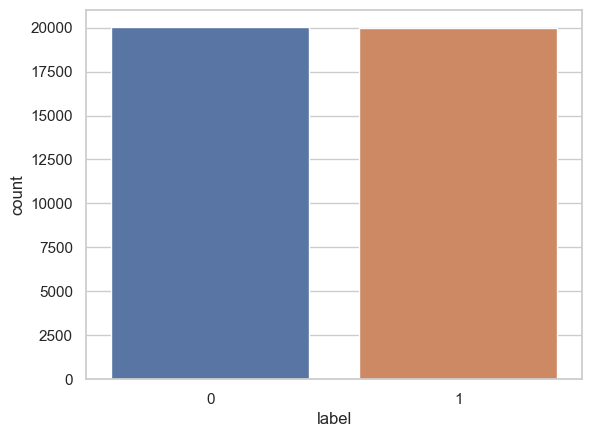

In [16]:
sns.countplot(data=df_train, x = 'label')
plt.show()

### Splitting the data into independent variable and dependent variable

In [18]:
x = df_train['text']
y = df_train['label']

### Splitting them into train and test

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

## The text in the x column needs to be converted into numeric for the model to understand and also to know the significance of specific words, using TF-IDF.

In [21]:
# importing required packages

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
pipeline_classify_rf = Pipeline([('TF-IDF', TfidfVectorizer()), ('Classifier_Model', RandomForestClassifier())])

In [23]:
pipeline_classify_rf.fit(x_train, y_train)
pred_train_rf = pipeline_classify_rf.predict(x_train)
pred_test_rf = pipeline_classify_rf.predict(x_test)

In [24]:
# Model Performance:

print('The classification report and confusion matrix for the Random forest classifier model is: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train, pred_train_rf))
print('--'*50)
print(confusion_matrix(y_train, pred_train_rf))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train, pred_train_rf))

print('The classification report and confusion matrix for Test data:')
print('\n')
print(classification_report(y_test, pred_test_rf))
print('--'*50)
print(confusion_matrix(y_test, pred_test_rf))
print('--'*50)
print('The accuracy score for test data:', accuracy_score(y_test, pred_test_rf))

The classification report and confusion matrix for the Random forest classifier model is: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15004
           1       1.00      1.00      1.00     14996

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

----------------------------------------------------------------------------------------------------
[[15004     0]
 [    0 14996]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 1.0
The classification report and confusion matrix for Test data:


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5015
           1       0.85      0.83      0.84      4985

    accuracy 

In [30]:
cross_val_train = cross_val_score(estimator=pipeline_classify_rf, X=x_train, y=y_train, cv=5, scoring='accuracy')
cross_val_test = cross_val_score(estimator=pipeline_classify_rf, X=x_test, y=y_test, cv=5, scoring='accuracy')
print('Cross Validation mean accuracy for train data is:', np.mean(cross_val_train))
print('Cross Validation mean accuracy for test data is:', np.mean(cross_val_test))

Cross Validation mean accuracy for train data is: 0.8384
Cross Validation mean accuracy for test data is: 0.8278000000000001


In [25]:
# Building XGBoost algorithm

from xgboost import XGBClassifier

In [26]:
pipeline_classify_xgb = Pipeline([('TF-IDF', TfidfVectorizer()), ('Classifier_Model', XGBClassifier())])
pipeline_classify_xgb.fit(x_train, y_train)
pred_train_xgb = pipeline_classify_xgb.predict(x_train)
pred_test_xgb = pipeline_classify_xgb.predict(x_test)

In [27]:
# Model Performance:

print('The classification report and confusion matrix for the XG Boost Classifier model is: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train, pred_train_xgb))
print('--'*50)
print(confusion_matrix(y_train, pred_train_xgb))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train, pred_train_xgb))

print('The classification report and confusion matrix for Test data:')
print('\n')
print(classification_report(y_test, pred_test_xgb))
print('--'*50)
print(confusion_matrix(y_test, pred_test_xgb))
print('--'*50)
print('The accuracy score for Test data:', accuracy_score(y_test, pred_test_xgb))

The classification report and confusion matrix for the XG Boost Classifier model is: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15004
           1       0.94      0.96      0.95     14996

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000

----------------------------------------------------------------------------------------------------
[[14079   925]
 [  529 14467]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 0.9515333333333333
The classification report and confusion matrix for Test data:


              precision    recall  f1-score   support

           0       0.86      0.85      0.85      5015
           1       0.85      0.87      0.86      4985

   

In [31]:
cross_val_train = cross_val_score(estimator=pipeline_classify_xgb, X=x_train, y=y_train, cv=5, scoring='accuracy')
cross_val_test = cross_val_score(estimator=pipeline_classify_xgb, X=x_test, y=y_test, cv=5, scoring='accuracy')
print('Cross Validation mean accuracy for train data is:', np.mean(cross_val_train))
print('Cross Validation mean accuracy for test data is:', np.mean(cross_val_test))

Cross Validation mean accuracy for train data is: 0.8546999999999999
Cross Validation mean accuracy for test data is: 0.8370000000000001


In [28]:
# Building Naive Bayes algorithm

pipeline_classify_bnb = Pipeline([('TF-IDF', TfidfVectorizer()), ('Classifier_Model', BernoulliNB())])
pipeline_classify_bnb.fit(x_train, y_train)
pred_train_bnb = pipeline_classify_bnb.predict(x_train)
pred_test_bnb = pipeline_classify_bnb.predict(x_test)

In [29]:
# Model Performance:

print('The classification report and confusion matrix for the XG Boost Classifier model is: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train, pred_train_bnb))
print('--'*50)
print(confusion_matrix(y_train, pred_train_bnb))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train, pred_train_bnb))

print('The classification report and confusion matrix for Test data:')
print('\n')
print(classification_report(y_test, pred_test_bnb))
print('--'*50)
print(confusion_matrix(y_test, pred_test_bnb))
print('--'*50)
print('The accuracy score for Test data:', accuracy_score(y_test, pred_test_bnb))

The classification report and confusion matrix for the XG Boost Classifier model is: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

           0       0.88      0.93      0.91     15004
           1       0.93      0.88      0.90     14996

    accuracy                           0.90     30000
   macro avg       0.91      0.90      0.90     30000
weighted avg       0.91      0.90      0.90     30000

----------------------------------------------------------------------------------------------------
[[13953  1051]
 [ 1821 13175]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 0.9042666666666667
The classification report and confusion matrix for Test data:


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5015
           1       0.87      0.83      0.85      4985

   

In [32]:
cross_val_train = cross_val_score(estimator=pipeline_classify_bnb, X=x_train, y=y_train, cv=5, scoring='accuracy')
cross_val_test = cross_val_score(estimator=pipeline_classify_bnb, X=x_test, y=y_test, cv=5, scoring='accuracy')
print('Cross Validation mean accuracy for train data is:', np.mean(cross_val_train))
print('Cross Validation mean accuracy for test data is:', np.mean(cross_val_test))

Cross Validation mean accuracy for train data is: 0.8516333333333334
Cross Validation mean accuracy for test data is: 0.8394999999999999


It is observed that XGBClassifier model is giving better accuracy when compared to Random Forest and Naive Bayes, hence using the model to predict the test data.

In [35]:
df_merged_test.iloc[0:,0:1].head()

,text
0,It's been about 14 years since Sharon Stone aw...
1,someone needed to make a car payment... this i...
2,The Guidelines state that a comment must conta...
3,This movie is a muddled mish-mash of clichés f...
4,Before Stan Laurel became the smaller half of ...


In [41]:
pred_test = pipeline_classify_xgb.predict(df_merged_test['text'])

In [42]:
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
print('The accuracy score for test data prediction is:', accuracy_score(df_merged_test['label'], pred_test))

The accuracy score for test data prediction is: 0.8537


In [45]:
df_merged_test['Predicted'] = pred_test

In [46]:
df_merged_test.head(20)

,text,label,Predicted
0,It's been about 14 years since Sharon Stone aw...,0,0
1,someone needed to make a car payment... this i...,0,0
2,The Guidelines state that a comment must conta...,0,0
3,This movie is a muddled mish-mash of clichés f...,0,0
4,Before Stan Laurel became the smaller half of ...,0,0
5,This is the best movie I've ever seen! <br /><...,1,1
6,The morbid Catholic writer Gerard Reve (Jeroen...,1,1
7,"""Semana Santa"" or ""Angel Of Death"" is a very w...",0,0
8,Somebody mastered the difficult task of mergin...,1,1
9,Why did I waste 1.5 hours of my life watching ...,0,0


In [48]:
def review_classify(review):
    result = pipeline_classify_xgb.predict([review])
    if result == [1]:
        print('The reviewer likes the movie')
    else:
        print('The reviewer does not like the movie')

Review 1:

"This exceptional film weaves a captivating narrative, featuring stellar performances, breathtaking cinematography, and a soul-stirring soundtrack, making it an absolute must-watch for any movie lover."

In [49]:
review_classify(
"This exceptional film weaves a captivating narrative, featuring stellar performances, breathtaking cinematography, and a soul-stirring soundtrack, making it an absolute must-watch for any movie lover.")

The reviewer likes the movie


Review 2:

"This dreadful movie is a convoluted mess, featuring uninspired acting, lackluster visuals, and a soundtrack that feels like an afterthought, making it a painful experience for any viewer."

In [50]:
review_classify("This dreadful movie is a convoluted mess, featuring uninspired acting, lackluster visuals, and a soundtrack that feels like an afterthought, making it a painful experience for any viewer.")

The reviewer does not like the movie
